---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 1 - Introduction to Machine Learning

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
cancer = load_breast_cancer()

In [3]:
## print(cancer.DESCR)

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Question 0

How many features does the breast cancer dataset have?

This function should return an integer.

In [5]:
def answer_zero():                                    ## Number of features
    return print(len(cancer['feature_names']))   

In [6]:
answer_zero()

30


### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame.

Convert the sklearn.dataset cancer to a DataFrame.

This function should return a (569, 31) DataFrame with

columns =

['mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error', 'fractal dimension error',
'worst radius', 'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension',
'target']

and index =

RangeIndex(start=0, stop=569, step=1)

In [7]:
cancer_data_frame = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [8]:
def answer_one():
    x = pd.DataFrame(cancer['data'] , columns = cancer['feature_names'])                                     
    y = pd.DataFrame(cancer['target'] , columns = ['target'] ) 
    z = pd.concat([x,y],axis=1) 
    return z

In [9]:
answer_one().shape

(569, 31)

### Question 2

What is the class distribution? (i.e. how many instances of malignant (encoded 0) and how many benign (encoded 1)?)

This function should return a Series named target of length 2 with integer values and index = ['malignant', 'benign']

In [10]:
def answer_two():
    values = answer_one()['target'].value_counts()
    values.index = ['benign', 'malignant']
    return values

In [11]:
answer_two()

benign       357
malignant    212
Name: target, dtype: int64

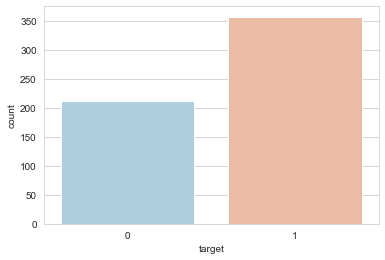

In [12]:
sbn.set_style('whitegrid')
sbn.countplot(x = answer_one()['target'], data = answer_one() , palette = 'RdBu_r')

### Question 3

Split the DataFrame into X (the data) and y (the labels).

This function should return a tuple of length 2: (X, y), where X, a pandas DataFrame, has shape (569, 30) y, a pandas Series, has shape (569,).

In [13]:
def answer_three():
    cancer_data = answer_one()
    y = cancer_data['target']
    X = cancer_data.drop('target',axis=1)
    return X, y

In [14]:
print(answer_three()[0].shape)
print(answer_three()[1].shape)

(569, 30)
(569,)


### Question 4

Using train_test_split, split X and y into training and test sets (X_train, X_test, y_train, and y_test).

Set the random number generator state to 0 using random_state=0 to make sure your results match the autograder!

This function should return a tuple of length 4: (X_train, X_test, y_train, y_test)

In [15]:
def answer_four():
    X, y = answer_three()
    X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)
    return X_train, X_test, y_train, y_test

In [16]:
print(answer_four()[0].shape)
print(answer_four()[1].shape)
print(answer_four()[2].shape)
print(answer_four()[3].shape)

(426, 30)
(143, 30)
(426,)
(143,)


### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with X_train, y_train and using one nearest neighbor (n_neighbors = 1).

This function should return a sklearn.neighbors.classification.KNeighborsClassifier.               

In [17]:
def answer_five():                                          ##  Training the classifier using the training data
    X_train, X_test, y_train, y_test = answer_four()
    knn = KNeighborsClassifier(n_neighbors = 1)    
    knn.fit(X_train, y_train)
    return knn

In [18]:
answer_five()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Question 6

Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use cancerdf.mean()[:-1].values.reshape(1, -1) which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

This function should return a numpy array either array([ 0.]) or array([ 1.])

In [19]:
def answer_six():
    mean_values = answer_three()[0].mean().values.reshape(1, -1)
    return answer_five().predict(mean_values)

In [20]:
answer_six()

array([1])

## Question 7

Using your knn classifier, predict the class labels for the test set X_test.

This function should return a numpy array with shape (143,) and values either 0.0 or 1.0.

In [21]:
def answer_seven():                                         ## Prediction of the Data Test
    X_train, X_test, y_train, y_test = answer_four()   
    return answer_five().predict(X_test)

In [22]:
answer_seven()

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

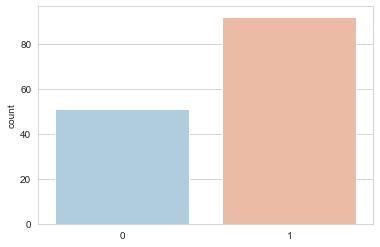

In [23]:
sbn.set_style('whitegrid')
sbn.countplot(x = answer_seven(), data = answer_one() , palette = 'RdBu_r')

### Question 8

Find the score (mean accuracy) of your knn classifier using X_test and y_test.

This function should return a float between 0 and 1

In [24]:
def answer_eight():                                                         ## Accuracy of the classifier
    return answer_five().score(answer_four()[1], answer_four()[3])

In [25]:
answer_eight()

0.916083916083916